In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../../data/cleaned/weekseries_04_19.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)

In [39]:
pred_len = 20
test_back = 1

ds_train = df[:-(pred_len+test_back)]
ds_test = df[-(pred_len+test_back):-test_back]

In [21]:
m = Prophet(yearly_seasonality=52) 
m.add_country_holidays(country_name='US')
m.fit(ds_train)
future = m.make_future_dataframe(periods=pred_len,freq='W',include_history=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast = m.predict(future)

In [36]:
y_act_past = df['y'][-(52+pred_len+test_back):-(pred_len+test_back)]
y_base = [y_act_past.mean()]*pred_len
y_act_past

731    216
732    260
733    248
734    284
735    257
736    200
737    220
738    177
739    263
740    212
741    203
742    228
743    200
744    214
745    202
746    208
747    214
748    246
749    262
750    232
751    213
752    211
753    278
754    207
755    213
756    217
757    190
758    259
759    285
760    223
761    210
762    248
763    216
764    179
765    211
766    196
767    222
768    246
769    230
770    233
771    215
772    226
773    289
774    255
775    220
776    260
777    159
778    261
779    274
780    275
781    234
782    150
Name: y, dtype: int64

In [37]:
x = forecast.index.values[-pred_len:]
y = forecast['yhat'][-pred_len:]
y_low = forecast['yhat_lower'][-pred_len:]
y_up = forecast['yhat_upper'][-pred_len:]
y_act = ds_test.y.values[:pred_len]
len(y_act)

20

In [38]:
mse_pr = mean_squared_error(y, y_act)
mse_bl = mean_squared_error(y_base, y_act)
print(mse_pr, mse_bl)

1239.2485042804478 2397.138091715977


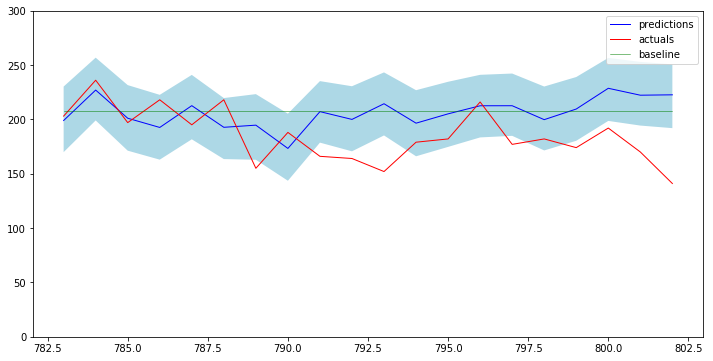

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b-', label='predictions', lw=1)
# ax.plot(x,y_up, 'b-', label='upper', lw=0.3)
# ax.plot(x,y_low, 'b-', label='lower', lw=0.3)
ax.fill_between(x, y_low, y_up, facecolor='lightblue')
ax.plot(x,y_act, 'r-', label='actuals', lw=1)
ax.plot(x,y_base, 'g-', label='baseline', lw=0.5)
ax.set_ylim(0,300)
ax.legend()